In [38]:
# Plot results 
import numpy as np
import matplotlib.pyplot as plt
import pickle

'''
Strategy annotation key:
1 Basic: Eager to a mixed set of target and non-group papers (6)
2 Eager to same set of non-group papers: Eager to a mixed set of target and non-group papers; eager to a shared set of non-group papers to push them to be full, thus not assigned to colluding members (3)
3 Indifferent to similar: Eager to a mixed set of target and non-group papers; indifferent to similar non-group papers (9)
4 Not willing to similar: Eager to a mixed set of target and non-group papers; not willing to similar non-group papers (2)
5 Eager cycle within group: Eager to a mixed set of target and non-group papers; make an eager cycle within a group (4)
6 Indifferent to popular, eager to unpopular: Eager to a mixed set of target and non-group papers; indifferent to likely popular target papers; eager to likely unpopular target papers (2)
'''

with open('data/maps.pkl', 'rb') as f:
    data = pickle.load(f)
    strategy_map = data['reviewer_to_strategy']

with open('data/Result.npy', 'rb') as f: # analysis done in other script
    success_by_reviewer = np.load(f)
    rank_by_reviewer_simple = np.load(f)
    rank_by_reviewer_cluster = np.load(f)
    rank_by_reviewer_lowrank = np.load(f)
    
    
def my_bar(data, fname, xlabel, xticks, ylabel, ymax):
    plt.rcParams.update({'font.size': 12})
    scale = 2
    x = np.arange(0, scale*len(data), scale) 
    plt.bar(x, data, width=1.5)
    plt.xticks(x, xticks)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.ylim([0, ymax])
    plt.tight_layout()
    plt.savefig('plots/'+fname)
    plt.show()
    
strategy_labels = ['Basic', 'Overlap', 'Neutral-\nin-area', 'Negative-\nin-area', 'Cycle', 'Popularity']

[6. 3. 9. 2. 4. 2.]


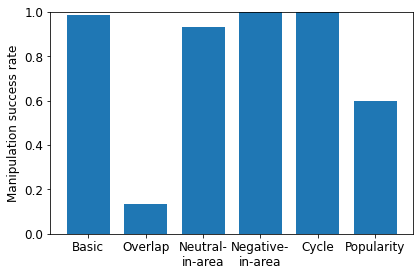

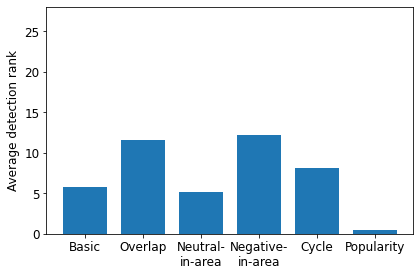

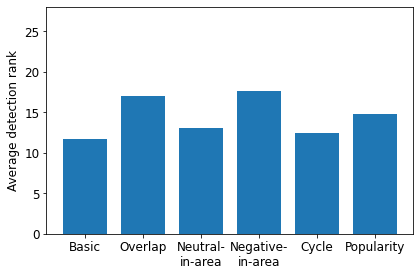

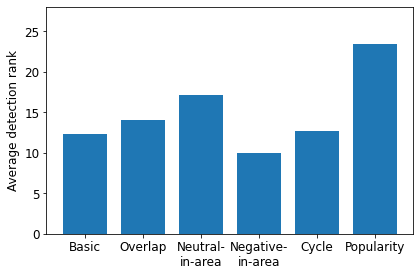

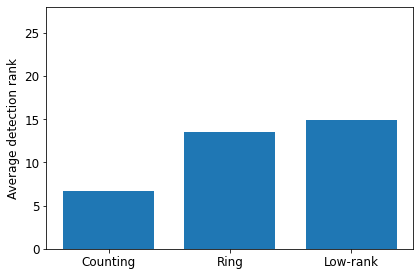

In [43]:
strategy_success = np.zeros(6)
strategy_count = np.zeros(6)
strategy_rank_simple = np.zeros(6)
strategy_rank_cluster = np.zeros(6)
strategy_rank_lowrank = np.zeros(6)
rank_total = np.zeros(3)
for r in range(success_by_reviewer.size):
    strat = strategy_map[r]
    if strat < 0:
        continue
    strategy_count[strat] += 1
    strategy_success[strat] += success_by_reviewer[r]
    strategy_rank_simple[strat] += rank_by_reviewer_simple[r]
    strategy_rank_cluster[strat] += rank_by_reviewer_cluster[r]
    strategy_rank_lowrank[strat] += rank_by_reviewer_lowrank[r]
    rank_total += np.array([rank_by_reviewer_simple[r], rank_by_reviewer_cluster[r], rank_by_reviewer_lowrank[r]])
    
strategy_success /= strategy_count
strategy_rank_simple /= strategy_count
strategy_rank_cluster /= strategy_count
strategy_rank_lowrank /= strategy_count
rank_total /= np.sum(strategy_count)
print(strategy_count)

    
# TODO larger text, strategy labels
my_bar(strategy_success, 'success.pdf', '', strategy_labels, 'Manipulation success rate', 1)
my_bar(strategy_rank_simple, 'rank_simple.pdf', '', strategy_labels, 'Average detection rank', 28)
my_bar(strategy_rank_cluster, 'rank_cluster.pdf', '', strategy_labels, 'Average detection rank', 28)
my_bar(strategy_rank_lowrank, 'rank_lowrank.pdf', '', strategy_labels, 'Average detection rank', 28)
my_bar(rank_total, 'rank_algos.pdf', '', ['Counting', 'Ring', 'Low-rank'], 'Average detection rank', 28)

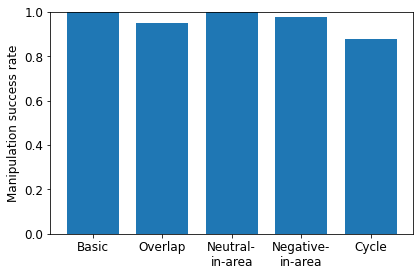

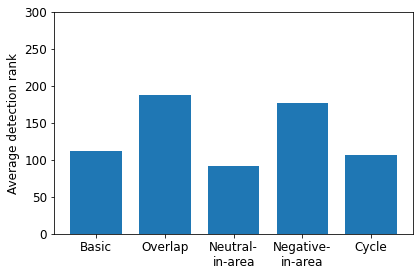

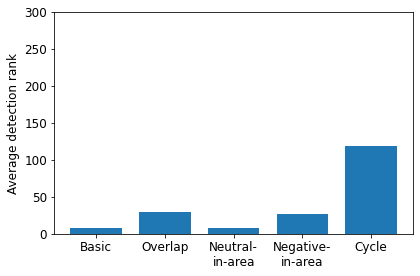

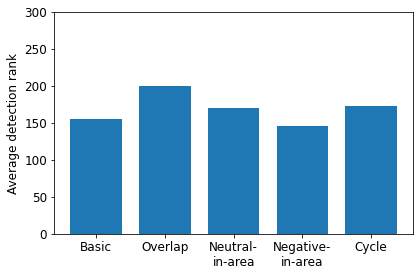

In [42]:
data = np.load('data/Result_synth.npz')
success_by_strategy=data['success_by_strategy']
rank_by_strategy_simple=data['rank_by_strategy_simple']
rank_by_strategy_cluster=data['rank_by_strategy_cluster']
rank_by_strategy_low_rank=data['rank_by_strategy_low_rank']

my_bar(success_by_strategy[:5], 'success_synth.pdf', '', strategy_labels[:5], 'Manipulation success rate', 1)
my_bar(rank_by_strategy_simple[:5], 'rank_simple_synth.pdf', '', strategy_labels[:5], 'Average detection rank', 300)
my_bar(rank_by_strategy_cluster[:5], 'rank_cluster_synth.pdf', '', strategy_labels[:5], 'Average detection rank', 300)
my_bar(rank_by_strategy_low_rank[:5], 'rank_lowrank_synth.pdf', '', strategy_labels[:5], 'Average detection rank', 300)
#my_bar(rank_total, 'rank_algos.pdf', 'Detection algorithm', ['counting', 'ring', 'low-rank'], 'Average detection rank')

-1


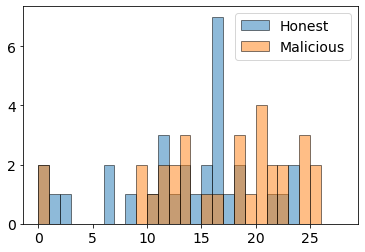

0


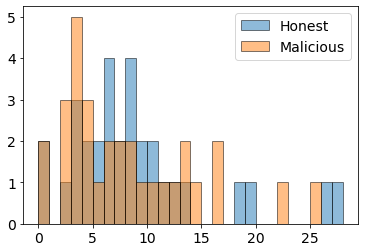

1


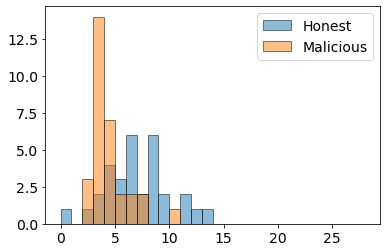

In [48]:
# Plot histograms of +/-/0 malicious reviewer bids

data = np.load('data/Biddings.npz')
HB = data['HB']
MB = data['MB']
honest_counts = {}
malicious_counts = {}
for bid in [-1, 0, 1]:
    h_counts = np.sum(HB == bid, axis=1)
    honest_counts[bid] = h_counts.tolist()
    m_counts = np.sum(MB == bid, axis=1)
    malicious_counts[bid] = m_counts.tolist()
    
    print(bid)
    plt.rcParams.update({'font.size': 14})
    plt.hist(h_counts, np.arange(29), alpha=0.5, label='Honest', edgecolor='k')
    plt.hist(m_counts, np.arange(29), alpha=0.5, label='Malicious', edgecolor='k')
    plt.legend(loc='upper right')
    plt.savefig(f'plots/bid_dist_{bid}.pdf')
    plt.show()